In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv('/Users/n.arcos89/Documents/GitHub/Estudio_Titanic/Data/titanic_final.csv')

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,embarked,class,embark_town,alive,alone
0,0,3,male,22.000000,1,0,S,Third,Southampton,no,False
1,1,1,female,38.000000,1,0,C,First,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,S,Third,Southampton,yes,True
3,1,1,female,35.000000,1,0,S,First,Southampton,yes,False
4,0,3,male,35.000000,0,0,S,Third,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,Second,Southampton,no,True
887,1,1,female,19.000000,0,0,S,First,Southampton,yes,True
888,0,3,female,29.699118,1,2,S,Third,Southampton,no,False
889,1,1,male,26.000000,0,0,C,First,Cherbourg,yes,True


In [16]:
#Siempre que nos den un df seguir un proceso de arreglar duplicados, arreglar datos nulos y comprobar tipo de datos (si no es correcto lo cambiamos)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   embarked     891 non-null    object 
 7   class        891 non-null    object 
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 70.6+ KB


<Axes: >

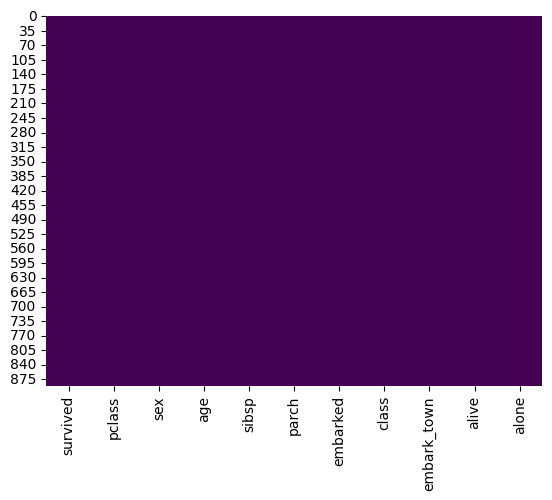

In [17]:
#valores nulos distorsionan la gráfica, hay que saber arreglarlos para evitarlo

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [18]:
#así detectamos los valores nulos que hay en un df y su porcentaje

df.isnull().sum() / len(df) *100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
embarked       0.0
class          0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [19]:
sns.histplot(df['Age'])

KeyError: 'Age'

In [ ]:
#si arreglamos los datos nulos con la media cuando hay muchos descompensa, evitarlo. 
#df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
#creamos gráfica de titanic
#puede ser interesante poner un print antes de cada gráfica explicando de qué se trata o qué vamos a analizar. 

import plotly.express as px

fig = px.histogram(df, x= 'Age', nbins= 50, title = 'Age distribution')
fig.show()

Solucionamos los valores nulos con Machine Learning, a basándonos en los valores más cercanos. 

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [ ]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<Axes: >

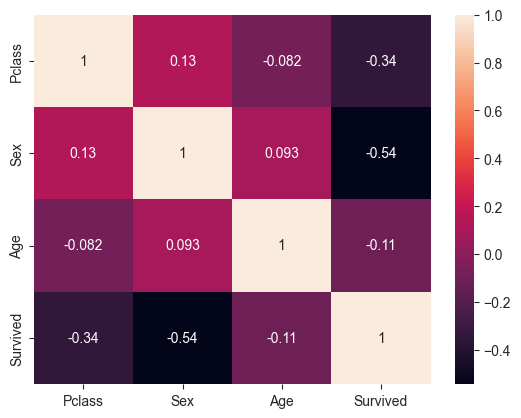

In [ ]:
encoder = LabelEncoder()
df_encoder = df.copy()
df_encoder = df_encoder.apply(encoder.fit_transform)
df_encoder =  df_encoder[['Pclass', 'Sex', 'Age',  'Survived']]
sns.heatmap(df_encoder.corr(), annot=True)


Paso 1: Estado inicial de los datos
Total de registros: 891
Valores nulos en Age: 177

Estadísticas iniciales:
              Age        Fare      Pclass         Sex
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    2.308642    0.647587
std     14.526497   49.693429    0.836071    0.477990
min      0.420000    0.000000    1.000000    0.000000
25%     20.125000    7.910400    2.000000    0.000000
50%     28.000000   14.454200    3.000000    1.000000
75%     38.000000   31.000000    3.000000    1.000000
max     80.000000  512.329200    3.000000    1.000000


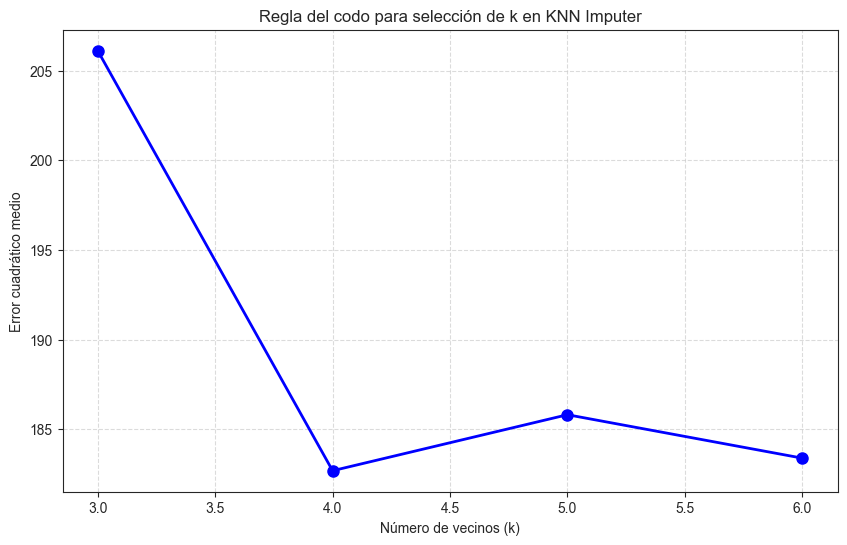


Número óptimo de vecinos (k) encontrado: 4

Estadísticas después de la imputación:
count    891.000000
mean      29.747646
std       12.608365
min        0.420000
25%       22.000000
50%       29.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Estadísticas originales (sin nulos):
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1811561541.py:111: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



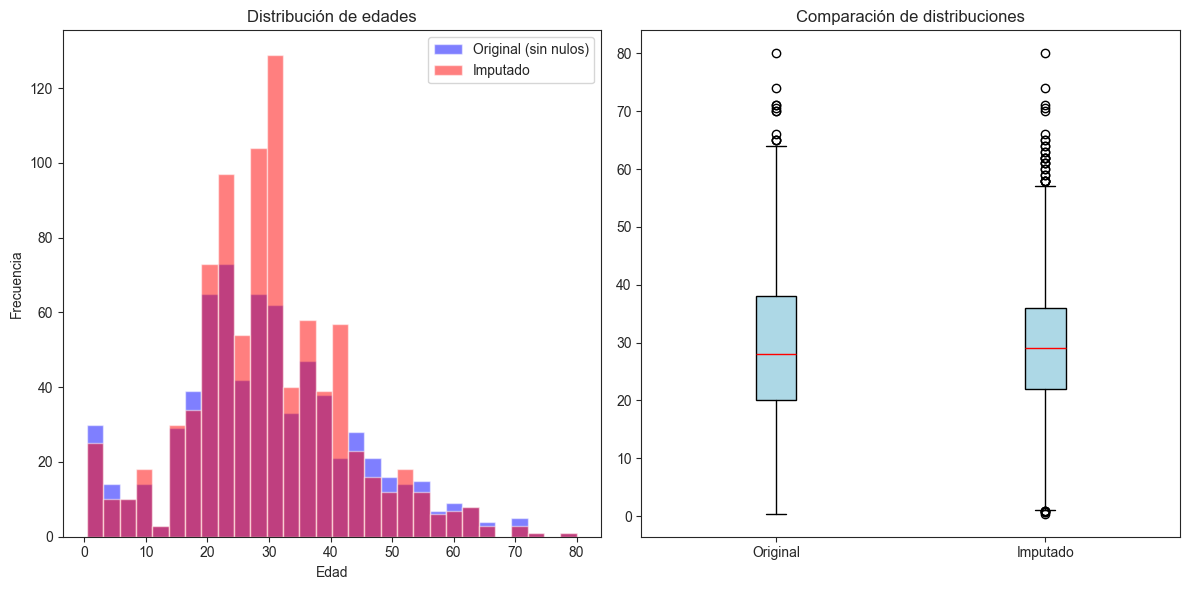


Métricas de calidad de la imputación:
MSE final: 182.68
RMSE final: 13.52


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Paso 1: Cargar y preparar los datos
# Propósito: Cargar el dataset y preparar las variables para el análisis
df = pd.read_csv('/Users/n.arcos89/Desktop/Data_Analytics/Temario/Módulo 1/Práctica/titanic (2).csv')
numeric_features = ['Age', 'Fare', 'Pclass', 'Sex'] # Seleccionar variables que queremos usar para establecer grupos
df_numeric = df[numeric_features].copy()

# Codificar la variable categórica 'sex' usando LabelEncoder
# Propósito: Convertir datos categóricos a numéricos para que KNN pueda procesarlos
le = LabelEncoder()
df_numeric['Sex'] = le.fit_transform(df_numeric['Sex'])

# Mostrar estado inicial de los datos
print("Paso 1: Estado inicial de los datos")
print(f"Total de registros: {len(df_numeric)}")
print(f"Valores nulos en Age: {df_numeric['Age'].isnull().sum()}")
print("\nEstadísticas iniciales:")
print(df_numeric.describe())

# Paso 2: Crear conjunto de validación
# Propósito: Separar datos para poder evaluar la calidad de la imputación
np.random.seed(42)  # Para reproducibilidad
# Seleccionar 20% de los datos con edad conocida para validación
test_mask = df_numeric['Age'].notna() & (np.random.rand(len(df_numeric)) < 0.2)
validation_age = df_numeric.loc[test_mask, 'Age'].copy()
df_numeric.loc[test_mask, 'Age'] = np.nan

# Paso 3: Calcular error para diferentes valores de k
# Propósito: Encontrar el número óptimo de vecinos para KNN
k_values = range(3, 7)  # Probar valores de k entre 3 y 6
mse_values = []

for k in k_values:
    # Aplicar KNN Imputer para cada valor de k
    imputer = KNNImputer(n_neighbors=k)
    data_imputed = imputer.fit_transform(df_numeric)
    
    # Calcular el error medio cuadrático para evaluar la calidad
    mse = mean_squared_error(
        validation_age,
        pd.DataFrame(data_imputed, columns=numeric_features).loc[test_mask, 'Age']
    )
    mse_values.append(mse)

# Paso 4: Visualizar la curva del codo
# Propósito: Visualizar gráficamente el punto óptimo de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Error cuadrático medio')
plt.title('Regla del codo para selección de k en KNN Imputer')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Paso 5: Encontrar el punto de codo
# Propósito: Determinar automáticamente el mejor valor de k
def find_elbow(x, y):
    """
    Encuentra el punto de codo usando el método de la máxima curvatura
    """
    # Calcular primera derivada
    dy = np.diff(y, 1)
    dx = np.diff(x, 1)
    dy_dx = dy/dx
    
    # Calcular segunda derivada
    d2y_dx2 = np.diff(dy_dx, 1)
    
    # Encontrar punto de máxima curvatura
    elbow_idx = np.argmax(np.abs(d2y_dx2)) + 1
    return x[elbow_idx]

optimal_k = find_elbow(np.array(list(k_values)), np.array(mse_values))
print(f"\nNúmero óptimo de vecinos (k) encontrado: {optimal_k}")

# Paso 6: Aplicar KNN con k óptimo
# Propósito: Realizar la imputación final con el mejor k
final_imputer = KNNImputer(n_neighbors=int(optimal_k))
data_final = final_imputer.fit_transform(df_numeric)
df_final = pd.DataFrame(data_final, columns=numeric_features)

# Paso 7: Mostrar resultados y comparaciones
# Propósito: Comparar estadísticas antes y después de la imputación
print("\nEstadísticas después de la imputación:")
print(df_final['Age'].describe())
print("\nEstadísticas originales (sin nulos):")
print(df['Age'].dropna().describe())

# Paso 8: Visualizar distribuciones
# Propósito: Comparar visualmente las distribuciones original e imputada
plt.figure(figsize=(12, 6))

# Histograma comparativo
plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=30, alpha=0.5, label='Original (sin nulos)', color='blue')
plt.hist(df_final['Age'], bins=30, alpha=0.5, label='Imputado', color='red')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.legend()

# Diagrama de cajas
plt.subplot(1, 2, 2)
plt.boxplot([df['Age'].dropna(), df_final['Age']], 
            labels=['Original', 'Imputado'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
plt.title('Comparación de distribuciones')

plt.tight_layout()
plt.show()

# Paso 9: Calcular métricas de calidad
# Propósito: Evaluar cuantitativamente la calidad de la imputación
print("\nMétricas de calidad de la imputación:")
print(f"MSE final: {mse_values[int(optimal_k)-3]:.2f}")  # Ajustado por el rango de k
print(f"RMSE final: {np.sqrt(mse_values[int(optimal_k)-3]):.2f}")

# Decodificar la variable 'sex' de vuelta a su forma original
df_final['Sex'] = le.inverse_transform(df_final['Sex'].astype(int))

<Axes: xlabel='Age', ylabel='Count'>

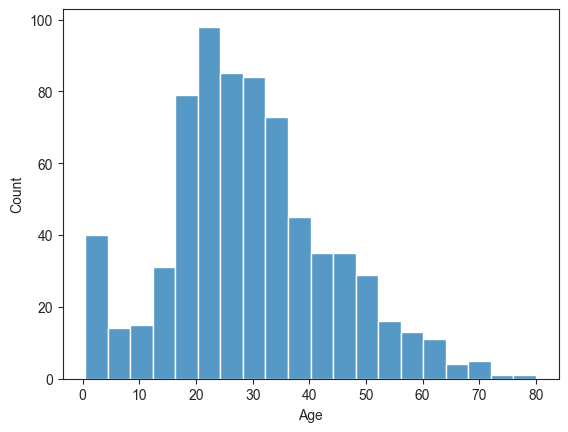

In [ ]:
sns.histplot(df['Age'])

EDA NATALIA
LA MUJER EN EL TITANIC

In [ ]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

Cuantas mujeres viajaban en el Titanic.

Número de mujeres: 314
Número de hombres: 577


/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1657628821.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




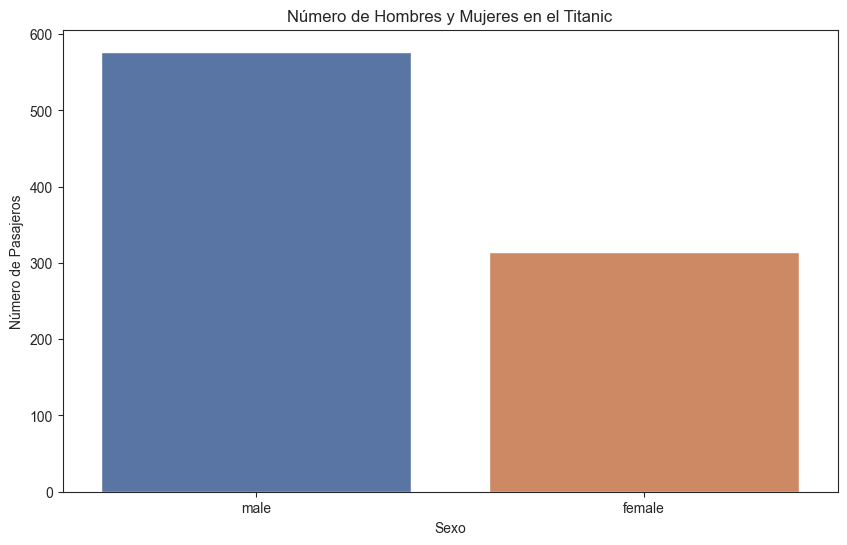

In [ ]:
# Imprimir el número exacto de mujeres y hombres
sex_counts = df['Sex'].value_counts()
print(f"Número de mujeres: {sex_counts['female']}")
print(f"Número de hombres: {sex_counts['male']}")

# Configurar el estilo de seaborn
sns.set_style('ticks')

# Crear el gráfico de barras para el conteo de hombres y mujeres
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df, palette='deep')
plt.title('Número de Hombres y Mujeres en el Titanic')
plt.xlabel('Sexo')
plt.ylabel('Número de Pasajeros')
plt.show()

In [ ]:
total = len(df)
female_percentage = (sex_counts['female'] / total) * 100
male_percentage = (sex_counts['male'] / total) * 100

In [ ]:
print (female_percentage)

35.24130190796858


In [ ]:
print(male_percentage)

64.75869809203144


Mujeres que viajaban con marido o hermanos

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/3341011668.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




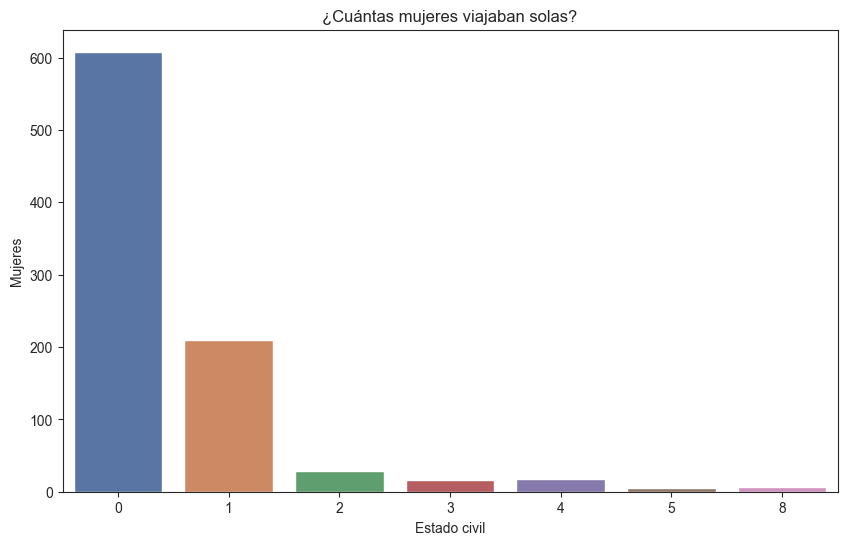

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Configurar el estilo de seaborn
sns.set_style('ticks')

# Crear el gráfico de barras para el conteo de hombres y mujeres
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', data=df, palette='deep')
plt.title('¿Cuántas mujeres viajaban solas?')
plt.xlabel('Estado civil')
plt.ylabel('Mujeres')
plt.show()

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres_solas = df[df['SibSp'] == 0]

# Imprimir el número exacto de mujeres solas
SibSp_counts = df['SibSp'].value_counts()
print(f"Número de mujeres solas: {SibSp_counts[0]}")


Número de mujeres solas: 608


Cuantas mujeres viajaban con padres o hijos

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/2023214077.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




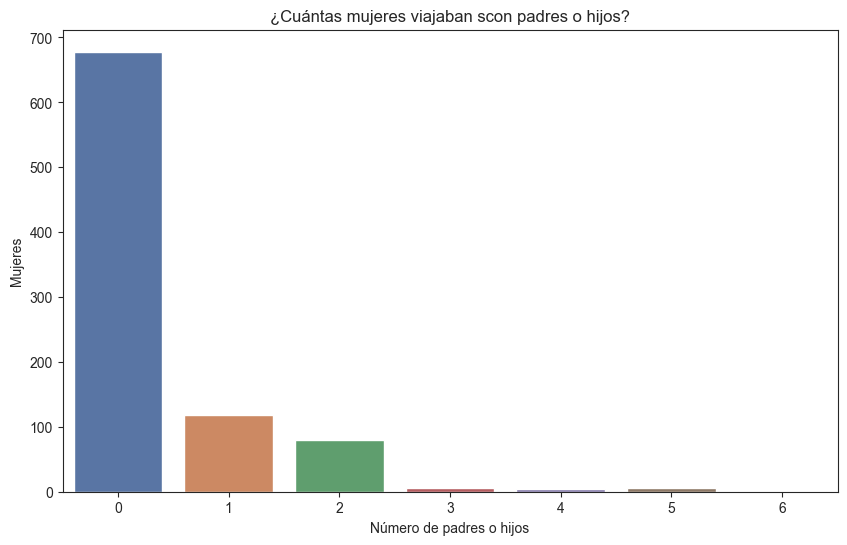

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Configurar el estilo de seaborn
sns.set_style('ticks')

# Crear el gráfico de barras para el conteo de hombres y mujeres
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', data=df, palette='deep')
plt.title('¿Cuántas mujeres viajaban scon padres o hijos?')
plt.xlabel('Número de padres o hijos')
plt.ylabel('Mujeres')
plt.show()

Mujeres que viabajan solas: sin marido ni hermanos ni hijos ni padres

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Filtrar las mujeres que viajaron solas (SibSp == 0 y Parch == 0)
df_mujeres_solas = df_mujeres[(df_mujeres['SibSp'] == 0) & (df_mujeres['Parch'] == 0)]

# Calcular el total de mujeres que viajaron solas
total_mujeres_solas = len(df_mujeres_solas)

# Imprimir el total de mujeres que viajaron solas
print(total_mujeres_solas)

126


Porcentaje de mujeres que viabajan solas

In [ ]:
total = len(df)
porcentaje_mujeres_solas = (total_mujeres_solas / sex_counts['female']) * 100
print(porcentaje_mujeres_solas)



40.12738853503185


En qué clase viajaban las mujeres

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Agrupar por la clase en la que viajaban y contar el número de mujeres en cada clase
df_mujeres_clase = df_mujeres.groupby('Pclass').size().reset_index(name='Cantidad')

# Crear la gráfica circular (gráfico de pastel)
fig = px.pie(df_mujeres_clase, values='Cantidad', names='Pclass', title='Número de Mujeres por Clase en el Titanic', labels={'Pclass': 'Clase', 'Cantidad': 'Número de Mujeres'})
fig.show()

En que puerto embarcaron más mujeres

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Agrupar por la clase en la que viajaban y contar el número de mujeres en cada clase
df_mujeres_embarque = df_mujeres.groupby('Embarked').size().reset_index(name='Cantidad')

# Crear la gráfica circular (gráfico de pastel)
fig = px.pie(df_mujeres_embarque, values='Cantidad', names='Embarked', title='En qué puerto embarcaron las mujeres', labels={'Embarked': 'Puerto', 'Cantidad': 'Número de Mujeres'})
fig.show()

S: Southampton, Inglaterra
C: Cherburgo, Francia (Cherbourg)
Q: Queenstown, Irlanda (actualmente Cobh, Irlanda)

Cuantas mujeres sobreviveron

In [ ]:
df_mujeres = df[df['Sex'] == 'female']
df_mujeres_supervivientes = df_mujeres[df_mujeres['Survived'] == 1]
total_mujeres_supervivientes = len(df_mujeres_supervivientes)
print(total_mujeres_supervivientes)

233


Porcentaje de mujeres supervivientes

In [ ]:
total = len(df)
porcentaje_mujeres_supervivientes = (total_mujeres_supervivientes / sex_counts['female']) * 100
print(porcentaje_mujeres_supervivientes)


74.20382165605095


Supervivencia de las mujeres por clases

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Filtrar el DataFrame para incluir solo a las mujeres que sobrevivieron
df_mujeres_supervivientes = df_mujeres[df_mujeres['Survived'] == 1]

# Agrupar por el puerto de embarque y contar el número de mujeres supervivientes en cada puerto
df_mujeres_supervivientes_embarque = df_mujeres_supervivientes.groupby('Embarked').size().reset_index(name='Cantidad')

# Crear la gráfica circular (gráfico de pastel)
fig = px.pie(df_mujeres_supervivientes_embarque, values='Cantidad', names='Embarked', title='Mujeres supervivientes por puerto de embarque', labels={'Embarked': 'Puerto', 'Cantidad': 'Número de Mujeres'})
fig.show()

Supervivencia de mujeres que viajaban solas vs acompañadas

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Filtrar las mujeres que viajaron solas (SibSp == 0 y Parch == 0)
df_mujeres_solas = df_mujeres[(df_mujeres['SibSp'] == 0) & (df_mujeres['Parch'] == 0)]

#Filtrar mujeres que viajaban solas y sobrevivieron
df_mujeres_solas_supervivientes = df_mujeres_solas[df_mujeres_solas['Survived']==1]

# Calcular el total de mujeres que viajaron solas
total_mujeres_solas_supervivientes = len(df_mujeres_solas_supervivientes)
print(total_mujeres_solas_supervivientes)

99


Porcentaje que suponen las mujeres solas supervivientes

In [ ]:
total = len(df)
porcentaje_mujeres_supervivientes = (total_mujeres_solas_supervivientes / total_mujeres_supervivientes) * 100
print(porcentaje_mujeres_supervivientes)

42.48927038626609


Mujeres Supervivientes por edades

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/4115323354.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/4115323354.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/4115323354.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Número de Mujeres Supervivientes')

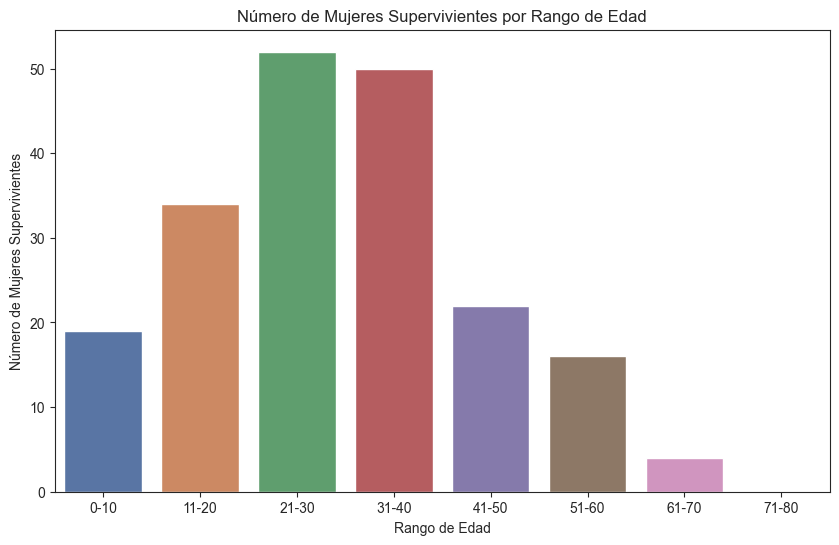

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres que sobrevivieron
df_mujeres_supervivientes = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]

# Crear rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_mujeres_supervivientes['Rango_Edad'] = pd.cut(df_mujeres_supervivientes['Age'], bins=bins, labels=labels, right=False)

# Agrupar por rango de edad y contar el número de mujeres supervivientes en cada rango
df_mujeres_supervivientes_rango_edad = df_mujeres_supervivientes.groupby('Rango_Edad').size().reset_index(name='Cantidad')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Rango_Edad', y='Cantidad', data=df_mujeres_supervivientes_rango_edad, palette='deep')
plt.title('Número de Mujeres Supervivientes por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Mujeres Supervivientes')

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1219096573.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1219096573.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1219096573.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

<Figure size 1000x600 with 0 Axes>

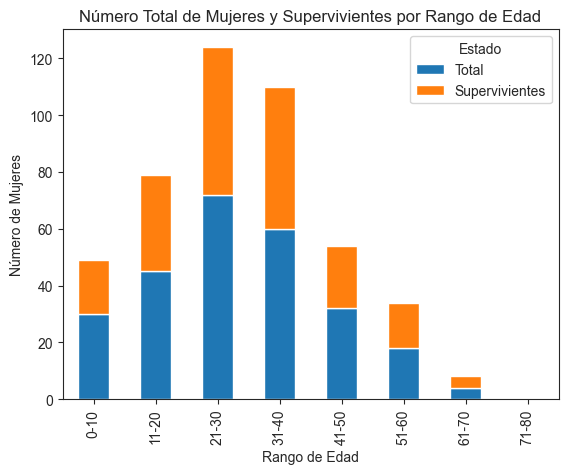

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Crear rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_mujeres['Rango_Edad'] = pd.cut(df_mujeres['Age'], bins=bins, labels=labels, right=False)

# Agrupar por rango de edad y contar el número total de mujeres en cada rango
df_mujeres_total_rango_edad = df_mujeres.groupby('Rango_Edad').size().reset_index(name='Total')

# Filtrar el DataFrame para incluir solo a las mujeres que sobrevivieron
df_mujeres_supervivientes = df_mujeres[df_mujeres['Survived'] == 1]

# Agrupar por rango de edad y contar el número de mujeres supervivientes en cada rango
df_mujeres_supervivientes_rango_edad = df_mujeres_supervivientes.groupby('Rango_Edad').size().reset_index(name='Supervivientes')

# Unir los DataFrames de total y supervivientes
df_mujeres_rango_edad = pd.merge(df_mujeres_total_rango_edad, df_mujeres_supervivientes_rango_edad, on='Rango_Edad', how='left')

# Convertir la columna 'Rango_Edad' a string para evitar problemas con categorías
df_mujeres_rango_edad['Rango_Edad'] = df_mujeres_rango_edad['Rango_Edad'].astype(str)

# Rellenar NaN con 0
df_mujeres_rango_edad.fillna(0, inplace=True)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
df_mujeres_rango_edad.set_index('Rango_Edad')[['Total', 'Supervivientes']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Número Total de Mujeres y Supervivientes por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Mujeres')
plt.legend(title='Estado')
plt.show()

In [ ]:
# Filtrar el DataFrame para incluir solo a las mujeres
df_mujeres = df[df['Sex'] == 'female']

# Crear rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_mujeres['Rango_Edad'] = pd.cut(df_mujeres['Age'], bins=bins, labels=labels, right=False)

# Agrupar por rango de edad y contar el número total de mujeres en cada rango
df_mujeres_total_rango_edad = df_mujeres.groupby('Rango_Edad').size().reset_index(name='Total')

# Filtrar el DataFrame para incluir solo a las mujeres que sobrevivieron
df_mujeres_supervivientes = df_mujeres[df_mujeres['Survived'] == 1]

# Agrupar por rango de edad y contar el número de mujeres supervivientes en cada rango
df_mujeres_supervivientes_rango_edad = df_mujeres_supervivientes.groupby('Rango_Edad').size().reset_index(name='Supervivientes')

# Unir los DataFrames de total y supervivientes
df_mujeres_rango_edad = pd.merge(df_mujeres_total_rango_edad, df_mujeres_supervivientes_rango_edad, on='Rango_Edad', how='left')

# Convertir la columna 'Rango_Edad' a string para evitar problemas con categorías
df_mujeres_rango_edad['Rango_Edad'] = df_mujeres_rango_edad['Rango_Edad'].astype(str)

# Rellenar NaN con 0
df_mujeres_rango_edad.fillna(0, inplace=True)

# Calcular el porcentaje de mujeres supervivientes por rango de edad
df_mujeres_rango_edad['Porcentaje_Supervivientes'] = (df_mujeres_rango_edad['Supervivientes'] / df_mujeres_rango_edad['Total']) * 100

# Verificar el DataFrame con los porcentajes
print(df_mujeres_rango_edad)

  Rango_Edad  Total  Supervivientes  Porcentaje_Supervivientes
0       0-10     30              19                  63.333333
1      11-20     45              34                  75.555556
2      21-30     72              52                  72.222222
3      31-40     60              50                  83.333333
4      41-50     32              22                  68.750000
5      51-60     18              16                  88.888889
6      61-70      4               4                 100.000000
7      71-80      0               0                        NaN


/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1920777025.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1920777025.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1013/1920777025.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

Comparación viajeros segun sexo

In [ ]:
sex_counts = df['Sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']

# Crear la gráfica circular (gráfico de pastel)
fig = px.pie(sex_counts, values='Count', names='Sex', title='Viajaban más hombres o más mujeres')
fig.show()

Comparación supervivientes por sexo

In [ ]:
# Agrupar por 'Survived' y 'Sex' y contar el número de ocurrencias
Sexo_supervivientes = df.groupby(['Survived', 'Sex']).size().reset_index(name='Count')

# Filtrar solo los supervivientes (Survived == 1)
Sexo_supervivientes = Sexo_supervivientes[Sexo_supervivientes['Survived'] == 1]

# Crear la gráfica circular (gráfico de pastel)
fig = px.pie(Sexo_supervivientes, values='Count', names='Sex', title='Sobrevivieron más hombres o más mujeres')
fig.show()